In [1]:
# Importing necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Question 1

Length of transform: 256


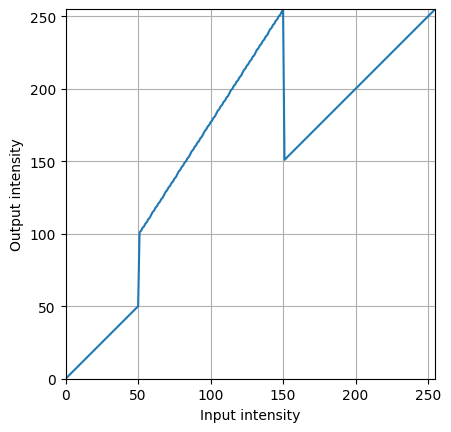

In [2]:
c = np.array([(50, 50), (50, 100), (150, 255), (150,150)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 -0).astype('uint8')
t2 = np.linspace(c[0,1]+1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
t3 = np.linspace(c[1,1]+1, c[2,1], c[2,0] - c[1,0]).astype('uint8')
t4 = np.linspace(c[2,1]+1, c[3,1], c[3,0] - c[2,0]).astype('uint8')
t5 = np.linspace(c[3,1]+1, 255, 255 - c[3,0]).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')

print("Length of transform: " + str(len(transform)))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r"Input intensity")
ax.set_ylabel(r"Output intensity")
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
ax.grid()

plt.savefig('./Report/resources/emma_intensity_transform_curve.png', dpi=300)
plt.show()

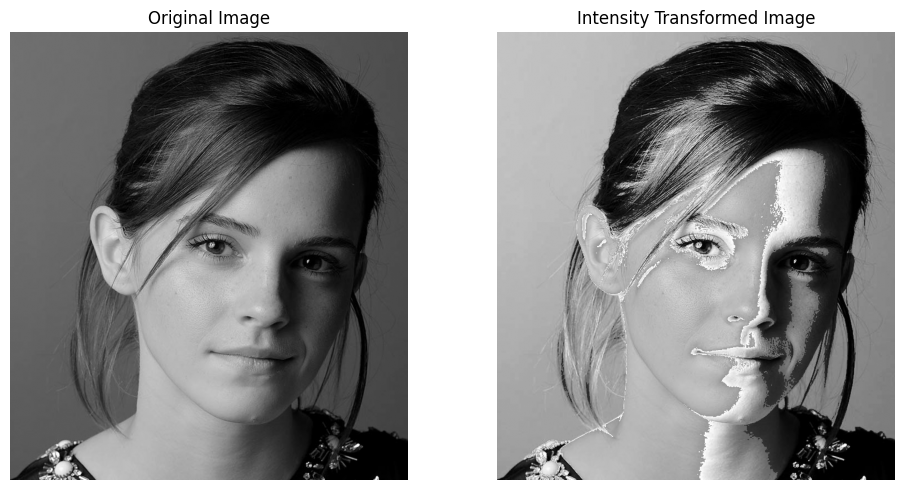

In [3]:
img_emma = cv.imread("./a1images/emma.jpg", cv.IMREAD_GRAYSCALE)

img_emma_transformed = cv.LUT(img_emma, transform)

cv.imwrite("./Report/resources/emma_original.jpg", img_emma)
cv.imwrite("./Report/resources/emma_transformed.jpg", img_emma_transformed)

# Display both images side by side using matplotlib
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(img_emma, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(img_emma_transformed, cmap='gray')
ax[1].set_title('Intensity Transformed Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()

# Question 2

### accentuate white matter and grey matter

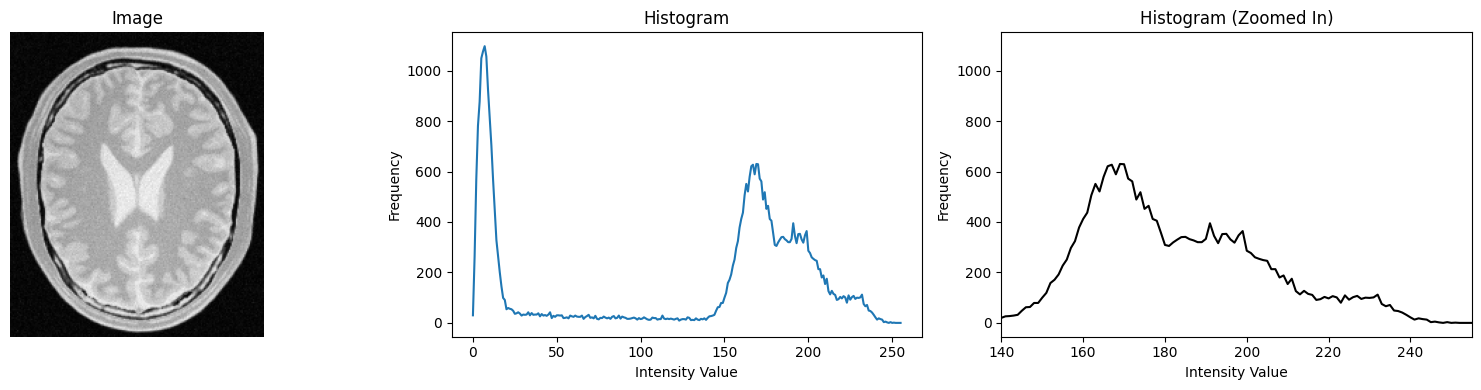

In [4]:
img_brain = cv.imread("./a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

hist = cv.calcHist([img_brain], [0], None, [256], [0, 256])
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
ax[0].imshow(img_brain, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Image')
ax[0].axis('off')
ax[1].plot(hist)
ax[1].set_title('Histogram')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')

# Show histogram with zoom
ax[2].plot(hist, color='black')
ax[2].set_title('Histogram (Zoomed In)')
ax[2].set_xlabel('Intensity Value')
ax[2].set_ylabel('Frequency')
ax[2].set_xlim(140, 255)  

plt.tight_layout()
plt.show()

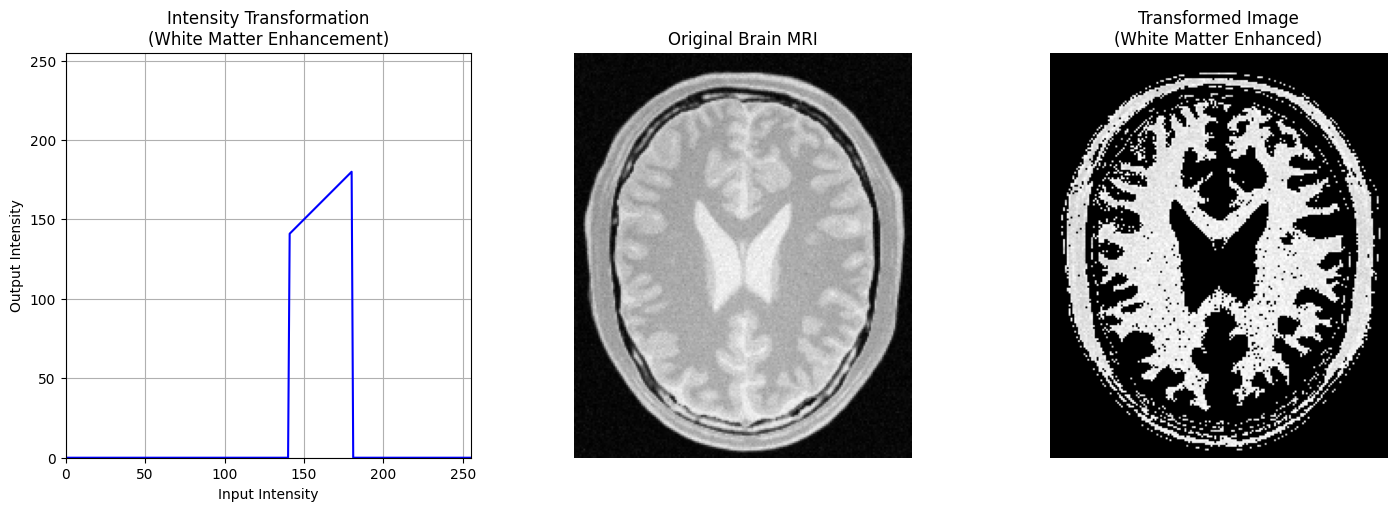

In [5]:
c = np.array([(140, 0), (180, 180)])

t1 = np.zeros(c[0, 0] + 1).astype('uint8')
t2 = np.linspace(c[0, 0] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
t3 = np.zeros(256 - len(t1) - len(t2)).astype('uint8')

intensity_transform_white_matter = np.concatenate((t1, t2, t3), axis=0).astype('uint8')

img_brain_transformed = cv.LUT(img_brain, intensity_transform_white_matter)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))


ax[0].plot(intensity_transform_white_matter, color='blue')
ax[0].set_title('Intensity Transformation\n(White Matter Enhancement)')
ax[0].set_xlabel('Input Intensity')
ax[0].set_ylabel('Output Intensity')
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[0].set_aspect('equal')
ax[0].grid(True)


ax[1].imshow(img_brain, cmap='gray')
ax[1].set_title('Original Brain MRI')
ax[1].axis('off')

# Transformed image
ax[2].imshow(img_brain_transformed, cmap='gray')
ax[2].set_title('Transformed Image\n(White Matter Enhanced)')
ax[2].axis('off')

plt.tight_layout()
plt.show()


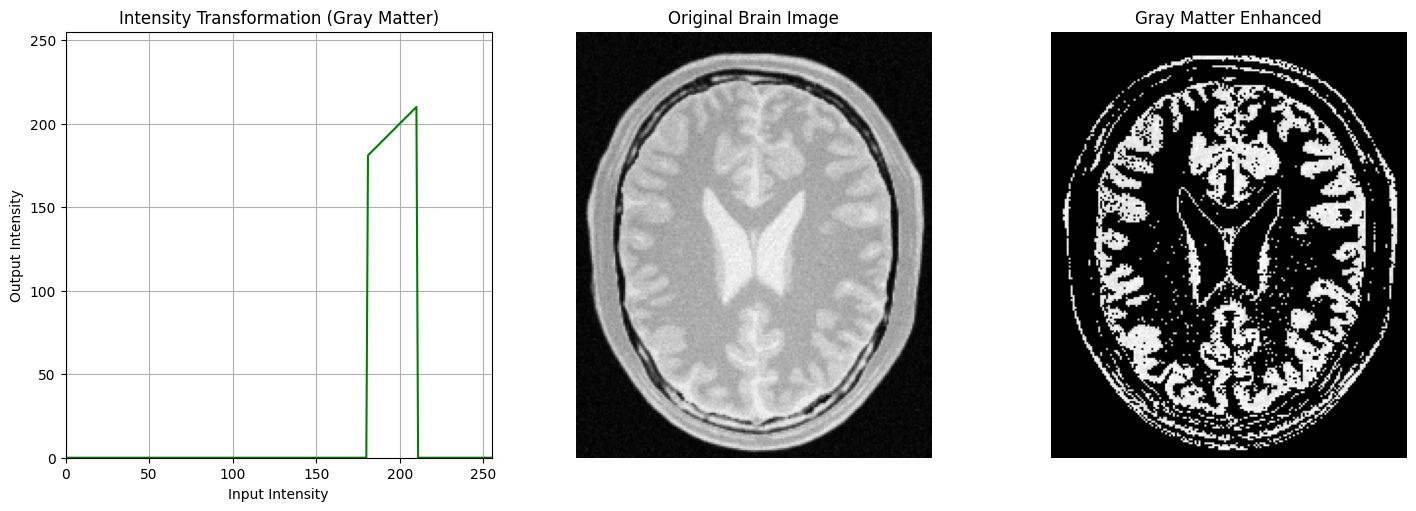

In [6]:
# Define control points for gray matter enhancement
control_points = np.array([(180, 0), (210, 210)])

# Create intensity transformation LUT
pre_transition = np.zeros(control_points[0, 0] + 1).astype('uint8')
transition = np.linspace(control_points[0, 0] + 1, control_points[1, 1], control_points[1, 0] - control_points[0, 0]).astype('uint8')
post_transition = np.zeros(256 - len(pre_transition) - len(transition)).astype('uint8')

# Final lookup table
intensity_transform_lut = np.concatenate((pre_transition, transition, post_transition)).astype('uint8')

# Apply transformation using LUT
transformed_brain_image = cv.LUT(img_brain, intensity_transform_lut)

# Plot everything
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Transformation plot
ax[0].plot(intensity_transform_lut, color='green')
ax[0].set_title("Intensity Transformation (Gray Matter)")
ax[0].set_xlabel("Input Intensity")
ax[0].set_ylabel("Output Intensity")
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[0].grid(True)
ax[0].set_aspect('equal')

# Original image
ax[1].imshow(img_brain, cmap='gray')
ax[1].set_title("Original Brain Image")
ax[1].axis('off')

# Transformed image
ax[2].imshow(transformed_brain_image, cmap='gray')
ax[2].set_title("Gray Matter Enhanced")
ax[2].axis('off')

plt.tight_layout()
plt.show()


# Question 3

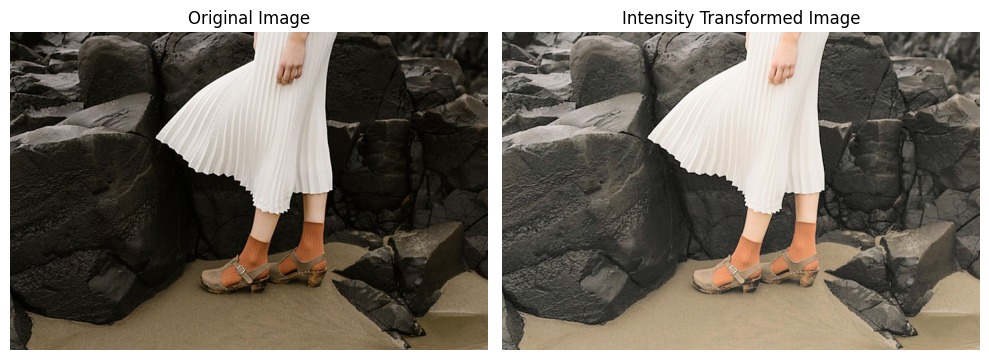

In [7]:
img_bgr = cv.imread('./a1images/highlights_and_shadows.jpg')

img_lab = cv.cvtColor(img_bgr, cv.COLOR_BGR2Lab)
L, a, b = cv.split(img_lab)
L_norm = L.astype(np.float32) / 255.0  # OpenCV uses 0–255 for L

# Apply gamma correction
gamma = 0.5  # <1 brightens, >1 darkens
L_gamma = np.power(L_norm, gamma)

L_new = np.clip(L_gamma * 255.0, 0, 255).astype(np.uint8)

# Merge and convert back to BGR
img_lab_new = cv.merge((L_new, a, b))
img_bgr_new = cv.cvtColor(img_lab_new, cv.COLOR_Lab2BGR)

# Display both images side by side using matplotlib
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(img_bgr_new, cv.COLOR_BGR2RGB))
ax[1].set_title('Intensity Transformed Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()

# Save result
#cv.imwrite('image_gamma_corrected.jpg', img_bgr_new)


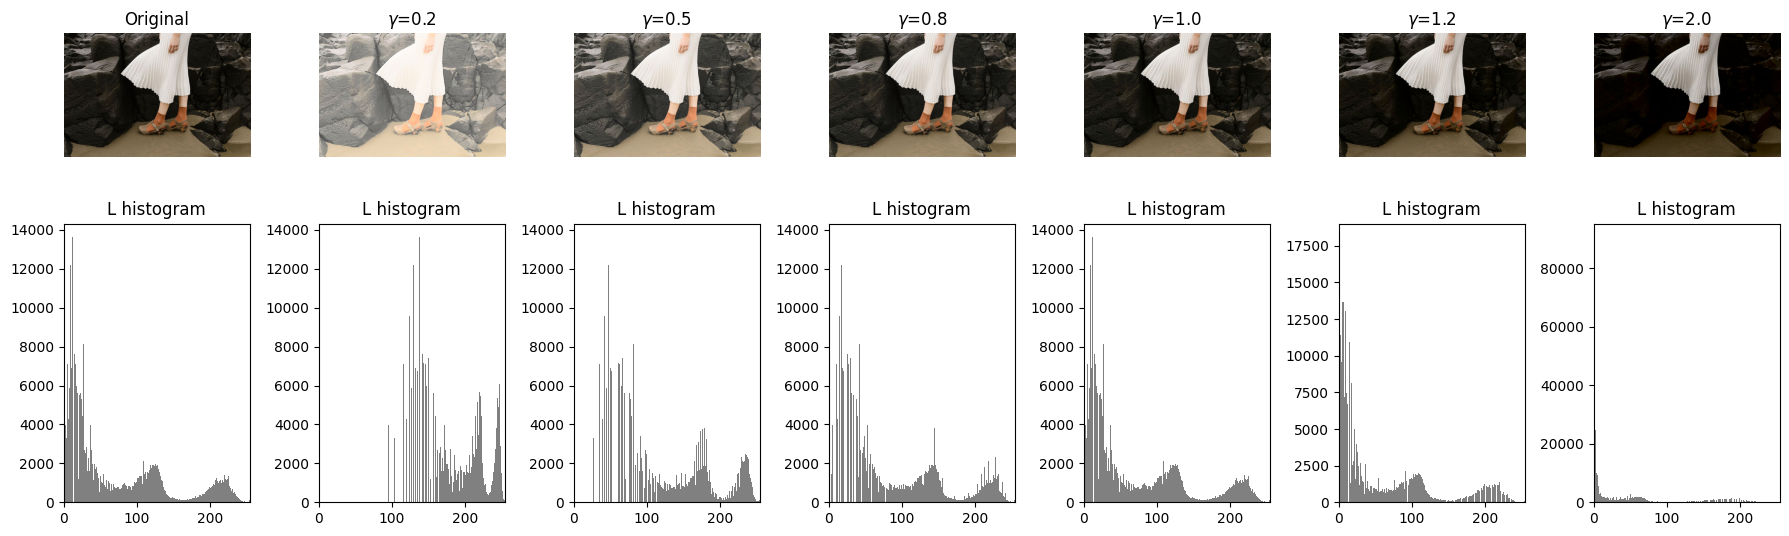

In [8]:
img_bgr = cv.imread('./a1images/highlights_and_shadows.jpg')

# Convert to Lab
img_lab = cv.cvtColor(img_bgr, cv.COLOR_BGR2Lab)
L, a, b = cv.split(img_lab)
L_norm = L.astype(np.float32) / 255.0  # Normalize to [0,1]

# Gamma values to test
gamma_values = [0.2, 0.5, 0.8, 1.0, 1.2, 2.0]  # <1 brightens, >1 darkens

# Prepare subplot 
fig, axes = plt.subplots(2, len(gamma_values) + 1, figsize=(18, 6))


axes[0, 0].imshow(cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB))
axes[0, 0].set_title("Original")
axes[0, 0].axis('off')

# Histogram for Original
axes[1, 0].hist(L.flatten(), bins=256, range=(0, 255), color='gray')
axes[1, 0].set_xlim([0, 255])
axes[1, 0].set_title("L histogram")

# --- Apply different gamma corrections ---
for i, gamma in enumerate(gamma_values):
    # Gamma correction
    L_gamma = np.power(L_norm, gamma)
    L_new = np.clip(L_gamma * 255.0, 0, 255).astype(np.uint8)

    # Merge and convert back
    img_lab_new = cv.merge((L_new, a, b))
    img_bgr_new = cv.cvtColor(img_lab_new, cv.COLOR_Lab2BGR)

    axes[0, i + 1].imshow(cv.cvtColor(img_bgr_new, cv.COLOR_BGR2RGB))
    axes[0, i + 1].set_title(f"$\gamma$={gamma}")
    axes[0, i + 1].axis('off')

    axes[1, i + 1].hist(L_new.flatten(), bins=256, range=(0, 255), color='gray')
    axes[1, i + 1].set_xlim([0, 255])
    axes[1, i + 1].set_title("L histogram")

plt.tight_layout()
plt.show()


# Question 4

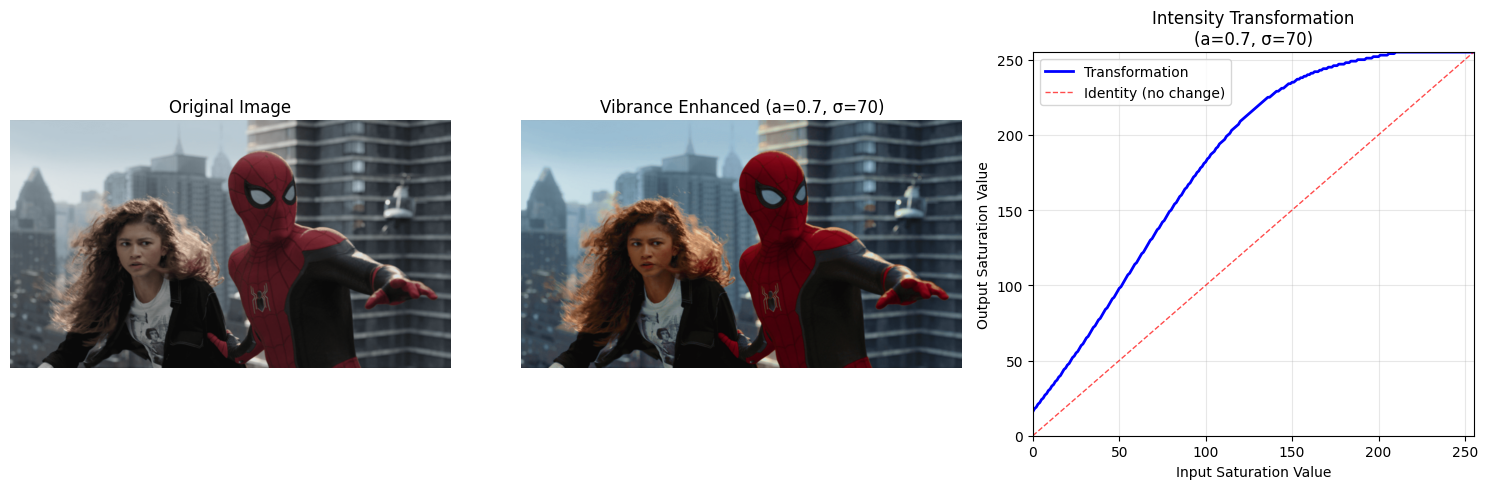

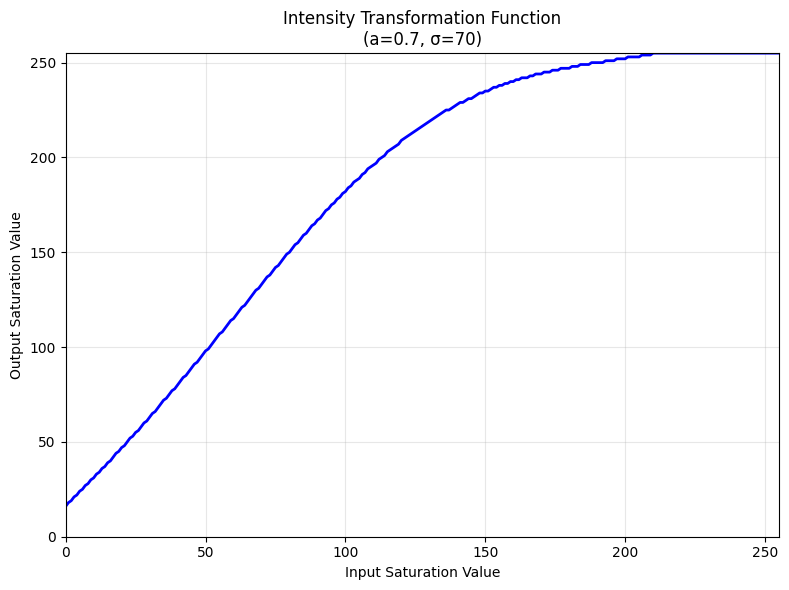

In [ ]:
def transformation(x: np.ndarray, a: float, sigma: int=70) -> np.ndarray:
    x_float = x.astype(np.float64) # To stop overflow
    exponent = -1 * (x_float - 128)**2 / (2 * sigma**2)
    fx = x_float + a * 128 * np.exp(exponent)
    return np.clip(fx, 0, 255).astype(np.uint8)

spider_img = cv.imread("./a1images/spider.png", cv.IMREAD_ANYCOLOR)
spider_hsv = cv.cvtColor(spider_img, cv.COLOR_BGR2HSV)
h, s, v = cv.split(spider_hsv)

# --- Applying the Transformation ---
a_val = 0.7  
sigma_val = 70
s_transformed = transformation(s, a=a_val, sigma=sigma_val)

spider_hsv_transformed = cv.merge([h, s_transformed, v])
spider_transformed_bgr = cv.cvtColor(spider_hsv_transformed, cv.COLOR_HSV2BGR)

original_rgb = cv.cvtColor(spider_img, cv.COLOR_BGR2RGB)
transformed_rgb = cv.cvtColor(spider_transformed_bgr, cv.COLOR_BGR2RGB)

# Transformation curve for visualization
x_range = np.arange(0, 256)
y_transform = transformation(x_range, a=a_val, sigma=sigma_val)


plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(original_rgb)
plt.title('Original Image')
plt.axis('off')

# Vibrance-enhanced image
plt.subplot(1, 3, 2)
plt.imshow(transformed_rgb)
plt.title(f'Vibrance Enhanced (a={a_val}, σ={sigma_val})')
plt.axis('off')

# Transformation function
plt.subplot(1, 3, 3)
plt.plot(x_range, y_transform, 'b-', linewidth=2, label='Transformation')
plt.plot(x_range, x_range, 'r--', linewidth=1, alpha=0.7, label='Identity (no change)')
plt.xlabel('Input Saturation Value')
plt.ylabel('Output Saturation Value')
plt.title(f'Intensity Transformation\n(a={a_val}, σ={sigma_val})')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 255)
plt.ylim(0, 255)

plt.tight_layout()
plt.show()


cv.imwrite("./Report/resources/spider_transformed.png", spider_transformed_bgr)


plt.figure(figsize=(8, 6))
plt.plot(x_range, y_transform, 'b-', linewidth=2, label='Transformation')
# plt.plot(x_range, x_range, 'r--', linewidth=1, alpha=0.7, label='Identity (no change)')
plt.xlabel('Input Saturation Value')
plt.ylabel('Output Saturation Value')
plt.title(f'Intensity Transformation Function\n(a={a_val}, σ={sigma_val})')
plt.grid(True, alpha=0.3)
# plt.legend()
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.tight_layout()
plt.savefig("./Report/resources/transformation_graph.png", dpi=300, bbox_inches='tight')
plt.show()

# Question 5

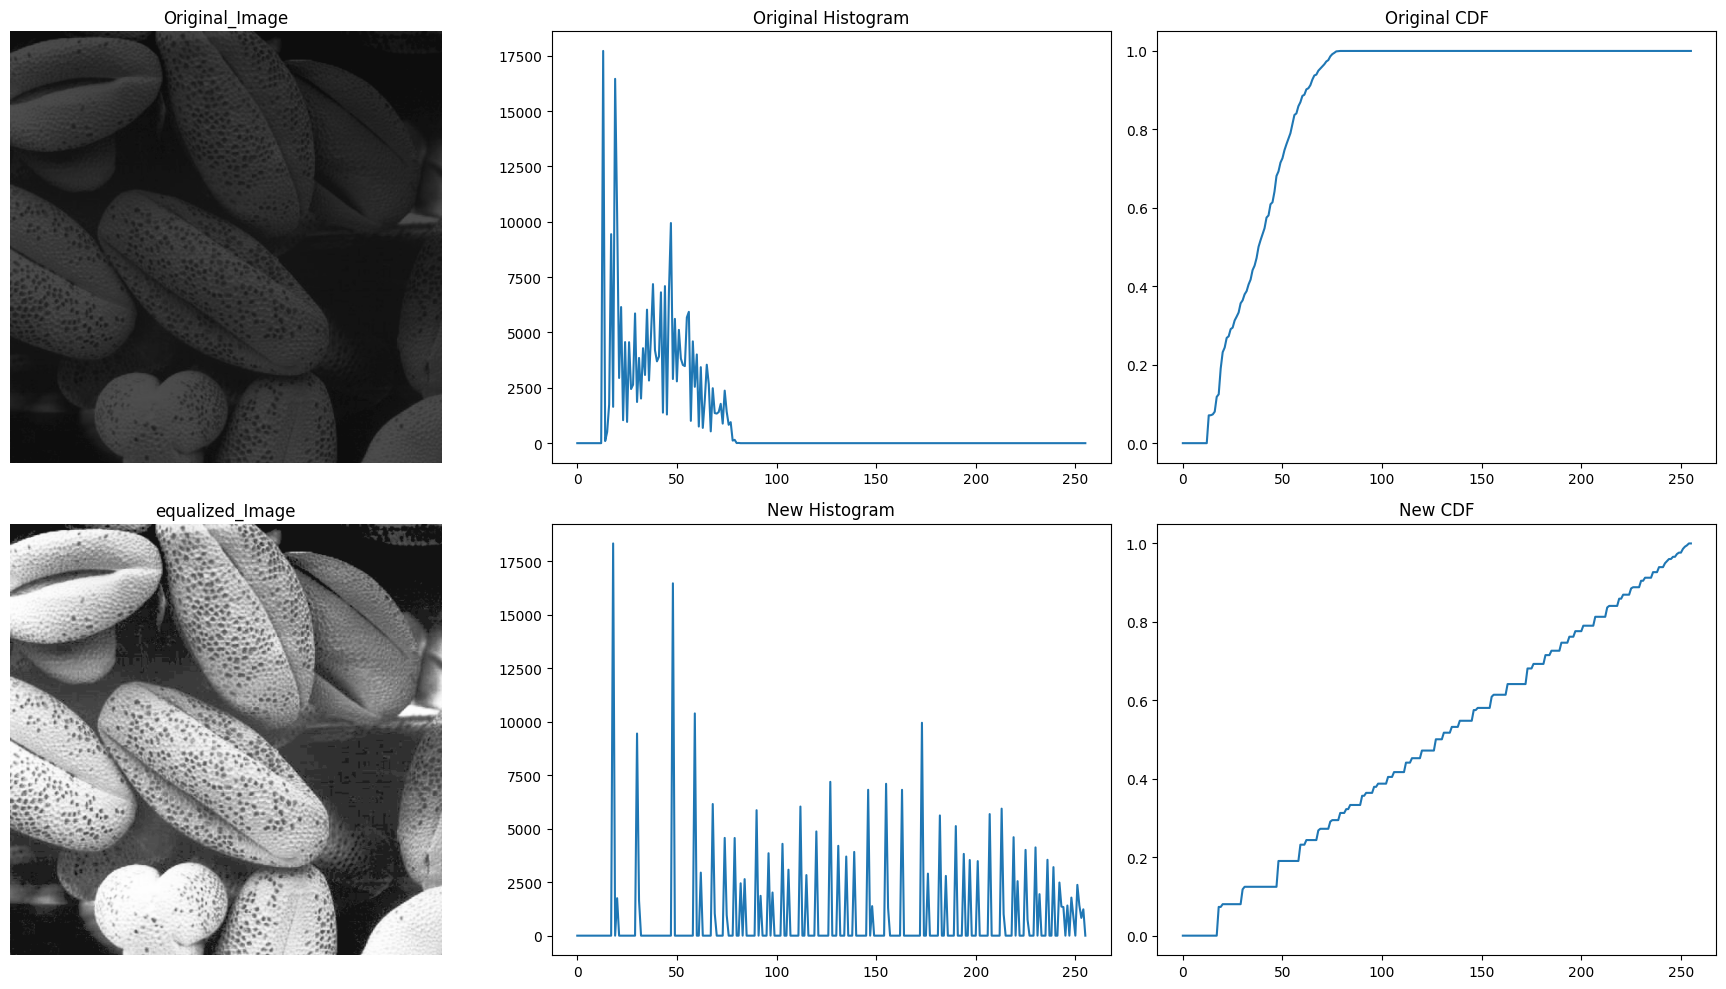

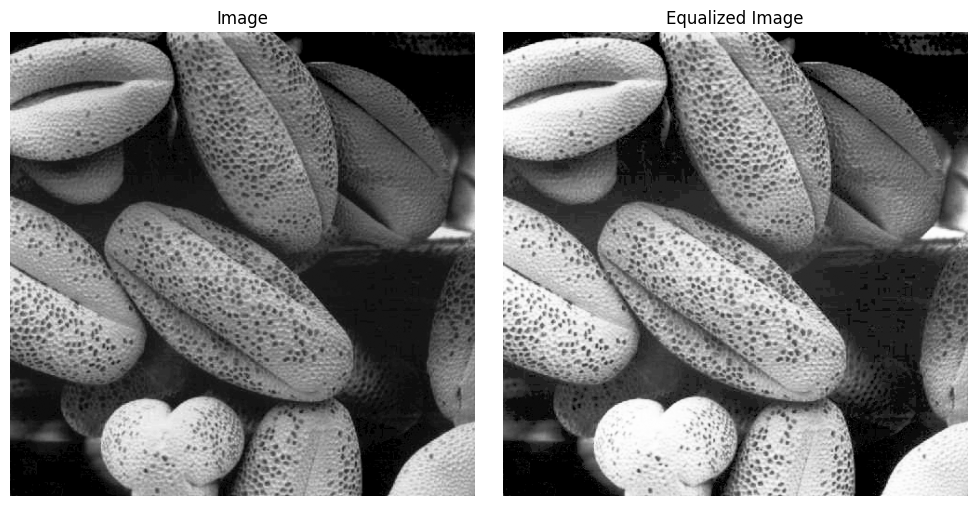

In [ ]:
def calculate_histogram(image: np.ndarray, height: int, width) -> np.ndarray:
    # Calculate histogram
    hist = np.zeros(256)
    for i in range(height):
        for j in range(width):
            hist[image[i, j]] += 1
    return hist

def calculate_cdf(image: np.ndarray, height, width):
    # Calculate cumulative distribution function (CDF)
    total_pixels = height * width

    hist = calculate_histogram(image, height, width)

    cdf = np.zeros(256)
    cdf[0] = hist[0]
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + hist[i]
        
    # Normalize CDF
    cdf_normalized = cdf / total_pixels

    return cdf_normalized, hist

def histogram_equalization(image: np.ndarray, debug: bool = False) -> np.ndarray:
    height, width = image.shape
    total_pixels = height * width

    original_cdf, original_histogram = calculate_cdf(image, height, width)

    # Apply transformation
    equalized_image = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            equalized_image[i, j] = (255 * original_cdf[image[i, j]]).astype(np.uint8)

    if debug:
        fig, ax = plt.subplots(2, 3, figsize=(18, 10))

        ax[0, 0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
        ax[0, 0].set_title("Original_Image")
        ax[0, 0].axis('off')


        ax[0, 1].plot(original_histogram)
        ax[0, 1].set_title("Original Histogram")

    
        ax[0, 2].plot(original_cdf)
        ax[0, 2].set_title("Original CDF")

        ax[1, 0].imshow(cv.cvtColor(equalized_image, cv.COLOR_BGR2RGB))
        ax[1, 0].set_title("equalized_Image")
        ax[1, 0].axis('off')

        equalized_cdf, equalized_histogram = calculate_cdf(equalized_image, height, width)

        ax[1, 1].plot(equalized_histogram)
        ax[1, 1].set_title("New Histogram")

        ax[1, 2].plot(equalized_cdf)
        ax[1, 2].set_title("New CDF")

        plt.tight_layout()
        plt.show()

    return equalized_image
    

img = cv.imread("./a1images/shells.tif", cv.IMREAD_GRAYSCALE)

equalized_img = histogram_equalization(img, debug=True)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(img, cmap='gray')
ax[0].set_title("Image")
ax[0].axis("off")

ax[1].imshow(equalized_img, cmap='gray')
ax[1].set_title("Equalized Image")
ax[1].axis("off")

plt.tight_layout()
plt.show()

# Question 6

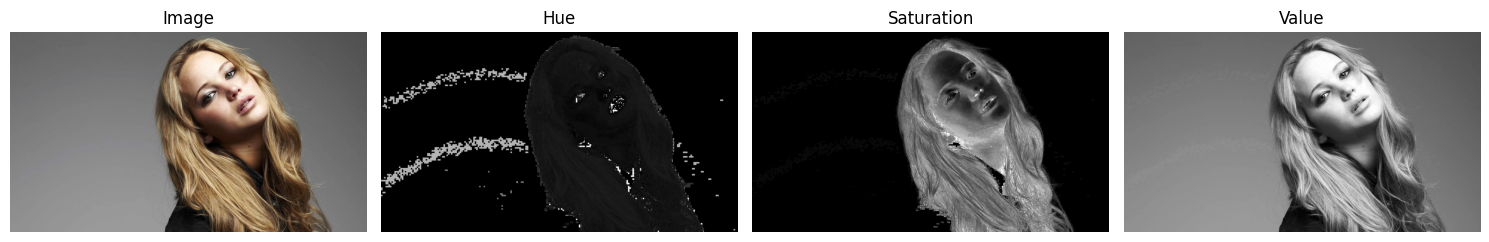

In [67]:
jeniffer_img = cv.imread("./a1images/jeniffer.jpg", cv.IMREAD_ANYCOLOR)

jeniffer_hsv = cv.cvtColor(jeniffer_img, cv.COLOR_BGR2HSV)
h, s, v = cv.split(jeniffer_hsv)

# Displaying the hsv planes in grey scale
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

ax[0].imshow(cv.cvtColor(jeniffer_img, cv.COLOR_BGR2RGB))
ax[0].set_title("Image")
ax[0].axis("off")

ax[1].imshow(h, cmap='grey')
ax[1].set_title("Hue")
ax[1].axis("off")

ax[2].imshow(s, cmap='grey')
ax[2].set_title("Saturation")
ax[2].axis("off")

ax[3].imshow(v, cmap='grey')
ax[3].set_title("Value")
ax[3].axis("off")

plt.tight_layout()
plt.show()


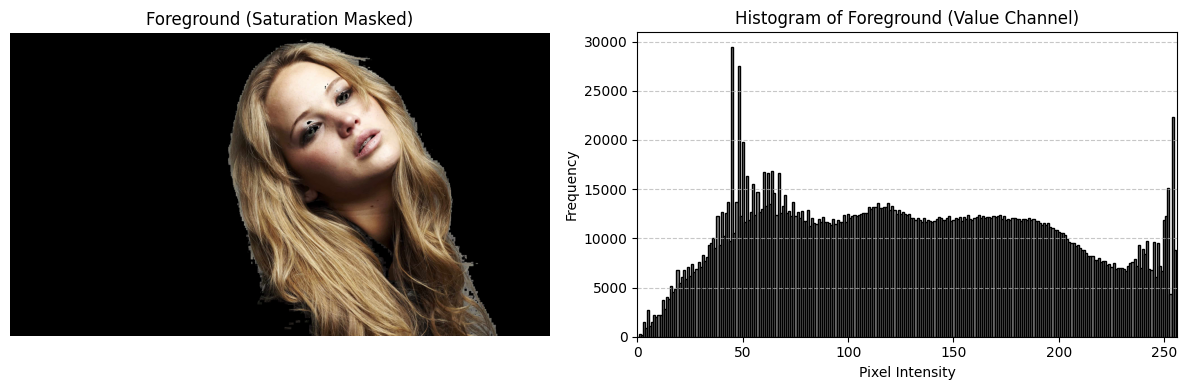

In [93]:
# Saturation plane is suitable select as the threshold for selecting foreground mask
_, mask = cv.threshold(s, 13, 255, cv.THRESH_BINARY)

jeniffer_foreground = cv.bitwise_and(jeniffer_img, jeniffer_img, mask=mask)

jeniffer_foreground_hsv = cv.cvtColor(jeniffer_foreground, cv.COLOR_BGR2HSV)

fg_h, fg_s, fg_v = cv.split(jeniffer_foreground_hsv)

jeniffer_foreground_hist = cv.calcHist([fg_v], [0], mask, [256], [0, 256]) 


# Plot results
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Foreground image
axes[0].imshow(cv.cvtColor(jeniffer_foreground, cv.COLOR_BGR2RGB))
axes[0].set_title("Foreground (Saturation Masked)")
axes[0].axis("off")

# Histogram (Bar Plot)
axes[1].bar(
    range(256),
    jeniffer_foreground_hist.flatten(),
    width=1,
    color="gray",
    edgecolor="black"
)
axes[1].set_title("Histogram of Foreground (Value Channel)")
axes[1].set_xlabel("Pixel Intensity")
axes[1].set_ylabel("Frequency")
axes[1].set_xlim([0, 256])
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

